<a href="https://colab.research.google.com/github/craiggossen/food-sales-prediction/blob/main/final_food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Food Sales Predictions
-Craig Gossen


#Project 1 - Part 1

##Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

Data Dictionary

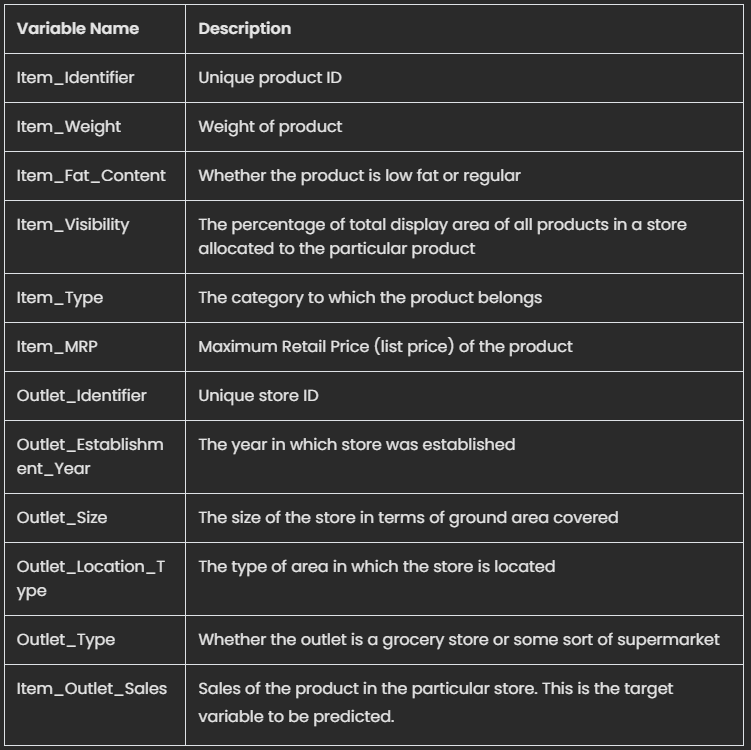

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Fundamentals/01 Week 1: Intro to ML/sales_predictions (2).csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.shape

(8523, 12)

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#Project 1 - Part 2

##Data Cleaning

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

'Item_Weight' and 'Outlet_Size' both have NaN data


In [10]:
#'Item_Weight'
df['Item_Weight'].value_counts(ascending = True)


5.400      1
7.685      1
6.520      1
9.420      1
5.885      2
          ..
9.300     68
11.800    76
13.650    77
17.600    82
12.150    86
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
df['Item_Weight'].describe().round(2)

count    7060.00
mean       12.86
std         4.64
min         4.56
25%         8.77
50%        12.60
75%        16.85
max        21.35
Name: Item_Weight, dtype: float64

In [12]:
#Since the range of the data is fairly tight (4.56 to 21.35) with mean near the midpoint, it appears outliers are not a factor. 
#Will replace NaN with median 
df['Item_Weight'].fillna(df['Item_Weight'].median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [13]:
#'Outlet_Size'
df['Outlet_Location_Type'].value_counts(ascending = True)

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

In [14]:
#'Outlet_Size'
df['Outlet_Size'].value_counts(ascending = True)

High       932
Small     2388
Medium    2793
Name: Outlet_Size, dtype: int64

In [15]:
#Due to size of missing data in 'Outlet_Size' (~2400 lines out of 8523), the NaN will be set to 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [16]:
df['Outlet_Size'].value_counts(ascending = True)

High        932
Small      2388
Missing    2410
Medium     2793
Name: Outlet_Size, dtype: int64

There are no NaN values left in the dataframe! 😀

Address the potential data name errors. 

In [17]:
df['Item_Fat_Content'].value_counts(ascending = True)

low fat     112
reg         117
LF          316
Regular    2889
Low Fat    5089
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
df['Item_Fat_Content'].value_counts(ascending = True)
#,('reg','Regular'),('LF', 'Low Fat')

Regular    3006
Low Fat    5517
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Outlet_Sales'].value_counts().sort_index(ascending = True)

33.2900       2
33.9558       1
34.6216       1
35.2874       1
36.6190       2
             ..
10306.5840    1
10993.6896    1
11445.1020    1
12117.5600    1
13086.9648    1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

Remaining columns of data appear accurate and ready to explore! ✨

Obtain the summary statistics of useful numberical column.

In [20]:
df['Item_Weight'].describe()

count                                                  8523
unique                                                  416
top       <bound method NDFrame._add_numeric_operations....
freq                                                   1463
Name: Item_Weight, dtype: object

In [21]:
df['Item_MRP'].describe().round(2)

count    8523.00
mean      140.99
std        62.28
min        31.29
25%        93.83
50%       143.01
75%       185.64
max       266.89
Name: Item_MRP, dtype: float64

In [22]:
df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

#Project 1 - Part 3

##Exploratory Visuals

Useful data may include 'Item_Outlet_Sales' (total_sales = df['Item_Outlet_Sales'].cumsum()), by Outlet_Type or by Item_Type

In [23]:
total_sales = df['Item_Outlet_Sales'].cumsum()


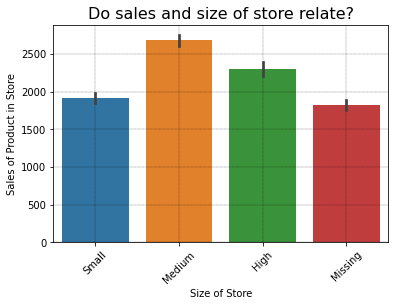

In [24]:
#Create barplot to see relationship of sales and store size
plt.figure(figsize=(6, 4))
sns.barplot(data = df, 
            x = 'Outlet_Size', 
            y = 'Item_Outlet_Sales',
            order = ['Small', 'Medium', 'High', 'Missing']
            );

plt.title('Do sales and size of store relate?', size = 16)
plt.xlabel('Size of Store')
plt.ylabel('Sales of Product in Store')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.25)
plt.xticks(rotation = 45)

plt.show()


There is no linear correlation between size and sales.

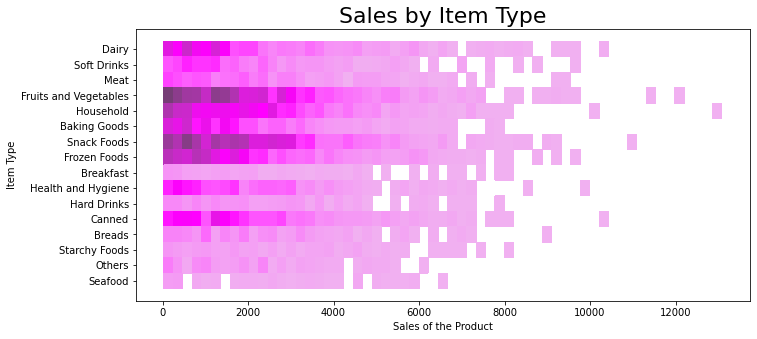

In [25]:
#Create histogram to see sales and item type relationship. 
plt.figure(figsize=(11, 5))
sns.histplot(data = df, 
             x = 'Item_Outlet_Sales',
             y = 'Item_Type',
             color = 'purple');
plt.title('Sales by Item Type', size = 22)
plt.xlabel('Sales of the Product')
plt.ylabel('Item Type')

plt.show()


Outlets that sell Fruits and Vegetables, Frozen Foods, and Snack Foods have relatively lower item sales

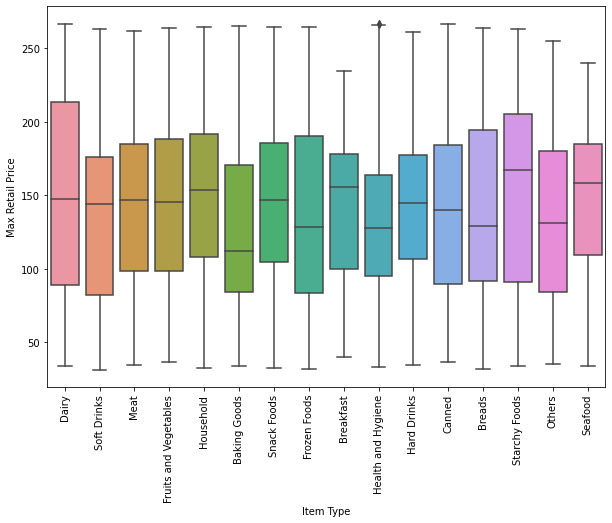

In [26]:
#Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(data = df, x = 'Item_Type', y = 'Item_MRP');
plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Max Retail Price')

plt.show()

Items with the lowest median MRP include baking goods, frozen foods, breads, and health and hygiene

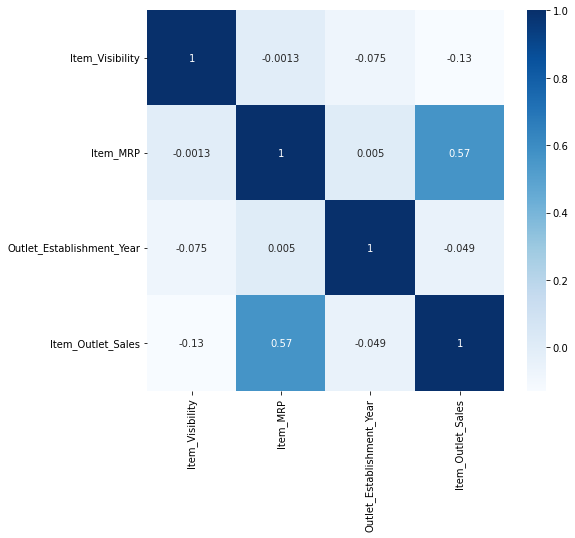

In [27]:
#Heat map for correlation
corr = df.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(corr, cmap = 'Blues', annot = True);

plt.show()

There is a moderate correlation between Maximum Retail Price (list price) of the product and the Sales of the product in the particular store (Item MRP).

#Project 1 - Part 4

##Explanatory Visuals

In [28]:
#Sales of dairy products and their fat content
dairy_filter = df['Item_Type'] == 'Dairy'

df2 = df[dairy_filter]


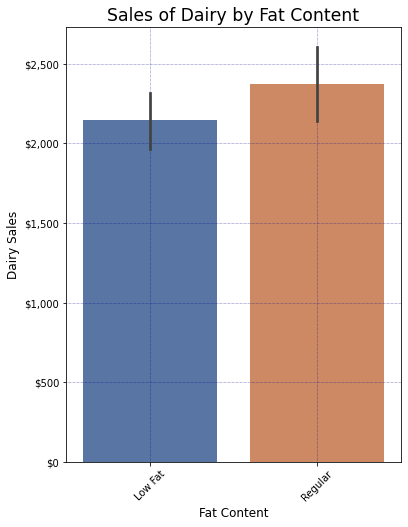

In [29]:
#Create barplot
fig,ax = plt.subplots(figsize=(6, 8))
sns.barplot(data = df2, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', palette = 'deep');
ax.set_title('Sales of Dairy by Fat Content', 
             size = 'xx-large',
             fontfamily = 'Sans Serif')
ax.set_xlabel('Fat Content',
              color = 'k', 
              size = 'large')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_ylabel('Dairy Sales', 
              color = 'k', 
              size = 'large')
ax.grid(color = 'darkblue', linestyle = ':', linewidth = 0.5)
plt.xticks(rotation = 45)
mpl.ticker.StrMethodFormatter('${x:,.0f}')

plt.show()

Total dairy sales of regular fat content items exceeded total sales of low fat alternatives.


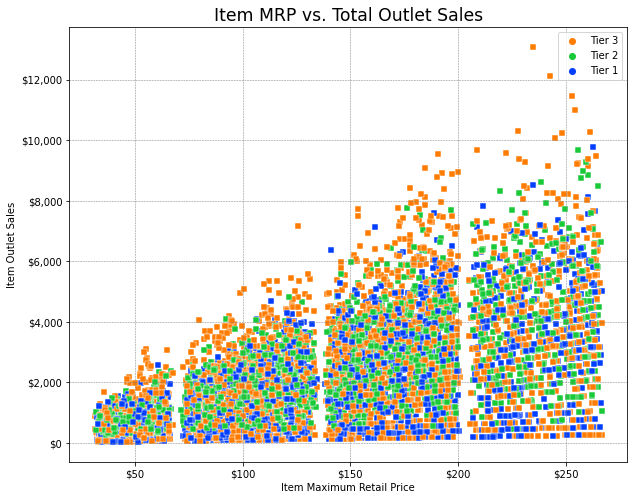

In [30]:
#Max product prices relation to total outlet sales by tier

#Function for formating axes
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
      #adds comma to the value, removes decimals
      return f"${x:,.0f}"

#Create scatterplot
fig,ax = plt.subplots(figsize=(10, 8))
order1 = df.Outlet_Location_Type.value_counts(ascending = False)
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Location_Type', palette = 'bright', marker = 's');

ax.set_xlabel('Item Maximum Retail Price')
ax.set_ylabel('Item Outlet Sales')
ax.set_title('Item MRP vs. Total Outlet Sales', size = 'xx-large')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

formatter = FuncFormatter(thousands)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

#Changing legend order
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[i] for i in order], [labels[i] for i in order])

#Citation: https://www.geeksforgeeks.org/how-to-change-order-of-items-in-matplotlib-legend/

plt.show()


The Tier 3 stores have trends showing higher maximum retail price and total outlet sales vs. the lower tier stores. Additionally, Tier 1 stores appear to dominate the lower outlet sales ranges.

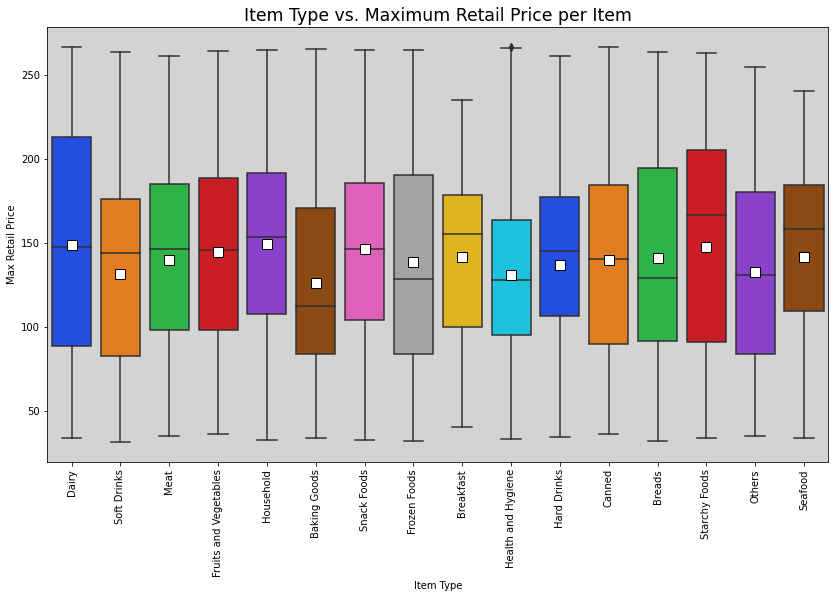

In [31]:
#Boxplot
fig,ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data = df, 
            x = 'Item_Type', 
            y = 'Item_MRP', 
            palette = 'bright', 
            showmeans = True, 
            meanprops = {'marker':"s", 
                         "markersize":'10',
                         'markerfacecolor':'w',
                         'markeredgecolor':'k'});

plt.xticks(rotation = 90)
ax.set_xlabel('Item Type')
ax.set_ylabel('Max Retail Price')
ax.set_title('Item Type vs. Maximum Retail Price per Item', size = 'xx-large')

ax.set_fc('lightgray')

plt.show()

There are no discernable trends associated by maximum retail price by item type. 

#Project 1 - Part 5

##Reload and Clean Data

In [32]:
eda_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Fundamentals/01 Week 1: Intro to ML/sales_predictions (2).csv')
eda_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [34]:
# Checking for duplicates
eda_df.duplicated().sum()

0

In [35]:
# Checking for NaN
eda_df.isna().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
# Know the 'Item_Fat_Content' has consistency issues
eda_df['Item_Fat_Content'].value_counts(ascending = True)

low fat     112
reg         117
LF          316
Regular    2889
Low Fat    5089
Name: Item_Fat_Content, dtype: int64

In [37]:
# Fixing inconsistent data within 'Item_Fat_Content'
eda_df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
eda_df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
eda_df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
eda_df['Item_Fat_Content'].value_counts(ascending = True)

Regular    3006
Low Fat    5517
Name: Item_Fat_Content, dtype: int64

In [38]:
eda_df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [39]:
eda_df.drop(columns = ['Item_Identifier', 'Outlet_Identifier'], inplace=True)
eda_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


The data appears clean for processing 😺

Feature Data Types:
- Numeric Features: Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year
- Nominal/Categorical Features: Item_Fat_Content, Item_Type, Outlet_Type
- Ordinal/Categorical Features: Outlet_Size, Outlet_Location_Type 

Item_Weight and Outlet_Size have missing values needing SimpleImputer

Pipelines needed for numeric (impute, scalar) and nominal (OrdinalEncoder, OHE).

Nominal features just need OHE. 

##Split the data (TTS)

In [40]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

In [41]:
# Train Test Split (TTS)
X = eda_df.drop(columns = 'Item_Outlet_Sales')
y = eda_df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Instantiate Transformers



In [42]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

##Instantiate Column Selector 

In [43]:
# Selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')


##Instantiate Numeric Pipeline

In [44]:
# Set up numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

##Ordinal Encoder

In [45]:
eda_df['Outlet_Size'].value_counts(ascending = True)

High       932
Small     2388
Medium    2793
Name: Outlet_Size, dtype: int64

In [46]:
#Create a list of ordinal labels, in order of least to most
eda_df['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)


##Instantiate Categorical Pipeline

In [47]:
#Set up Categorical pipeline
categorical_pipe = make_pipeline(missing_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## Instantiate ColumnTransformer

In [48]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9937d8dd90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9937d8dd10>)])

## Transformer Data

In [49]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9937d8dd90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9937d8dd10>)])

In [50]:
# transform train and test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [51]:
# Make data into dataframe for viewing
X_train_df = pd.DataFrame(X_train_transformed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [52]:
X_train_transformed[:5]

array([[ 0.81724868, -0.71277507,  1.82810922,  1.32784893,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888,  1.32784893,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-0.13151196,  1.8133